<a href="https://colab.research.google.com/github/D4ve39/pythonProg/blob/master/MachineLearningDeepDive_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Clustering: Mall customers 

Can we find groupings of customers in Malls?

### `TODO` Import the data

In [ ]:
# TODO: Use pd.read_csv to load the data in the file "../data/titanic.csv"
url = "https://gitlab.com/analytics-club/ml-workshop/ml-workshop/-/raw/master/data/Mall_Customers.csv"
df = pd.read_csv(url)

# TODO: Replace `None` with the shape of the dataframe
print("Number of (rows, cols):", None)
df.head()

Number of (rows, cols): None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Map "male" to 0 and "female" to 1
mapping = {'Male': 0, 'Female': 1}
df = df.replace({'Gender': mapping})

# Remove the customer ID column (carries no important information)
df = df.drop('CustomerID', axis=1)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# Visualise the given data

### Age vs Annual Income

Do you see any clusters?

Text(0, 0.5, 'Annual Income (k$)')

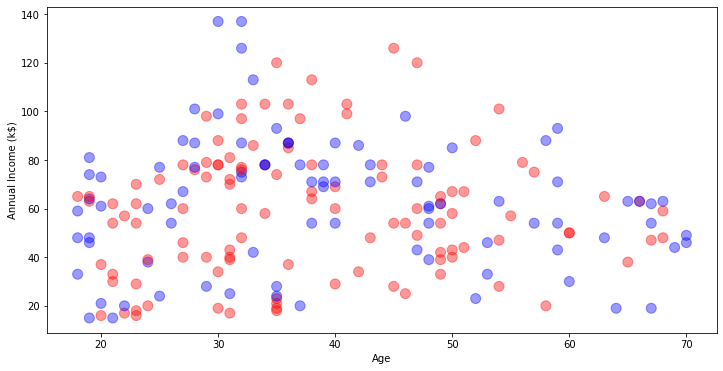

In [ ]:
# the colors for the points: red for female and blue for male
colors = ["b" if gender == 0 else "r" for gender in df["Gender"]]

# a bigger than usual figure 
plt.figure(figsize=(12,6))

# Scatter plot with "Age" on the x axis and "Annual Income (k$)" on the y axis,
# with bubble size s=100 and opacity of alpha=0.4
plt.scatter(df['Age'], df['Annual Income (k$)'], s=100, color=colors, alpha=0.4)

# don't forget the labels!!!! 
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

### `TODO` Spending vs Annual Income

What about now? 

Text(0, 0.5, 'Annual Income (k$)')

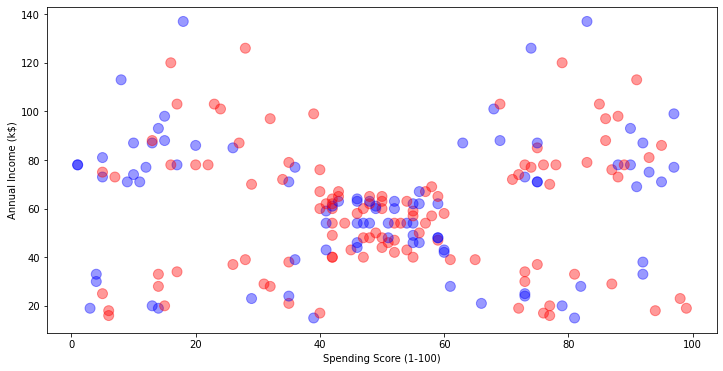

In [ ]:
colors = ["b" if gender == 0 else "r" for gender in df["Gender"]]

plt.figure(figsize=(12,6))
# TODO: Do a scatter plot with "Spending Score (1-100)" on the x axis and "Annual Income (k$)" on the y axis
# See the cell above, if you're unsure how that's done.

# Scatter plot with "Age" on the x axis and "Annual Income (k$)" on the y axis,
# with bubble size s=100 and opacity of alpha=0.4
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], s=100, color=colors, alpha=0.4)

# don't forget the labels!!!! 
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
# TODO: Add axis labels!

# Identifying the clusters

### Prepare the data

We have no labels! The features are all the columns in the dataframe. <br>
The clusters are based on annual income and spending score, not gender and age.

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']] 

### `TODO` Run k-Means

How many clusters do you expect? 

In [ ]:
km = KMeans()
km.fit(X)
labels = km.predict(X)
centroids = km.cluster_centers_

### Plot the results

Who are the groups you identified? What happens if you change the number of clusters? (If you chose more than 8 you have to add more colours to `palette`).

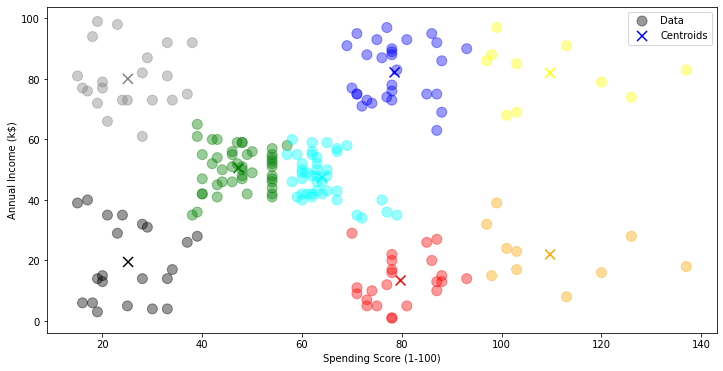

In [ ]:
palette = ["b", "r", "g", "k", "orange", "gray", "cyan", "yellow"]
colors = [palette[label] for label in labels]

plt.figure(figsize=(12,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], color=colors, s=100, alpha=0.4, label="Data")
plt.scatter(centroids[:, 0], centroids[:, 1], color=palette[:len(centroids)], marker="x", s=100, label="Centroids")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.legend(loc="best")